In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

 


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

#  Display first few rows of the dataset
print("\n📌 First 5 Rows of the Dataset:")
print(df.head())



📌 First 5 Rows of the Dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']  # Target variable (1 = Purchased, 0 = Not Purchased)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [7]:
y_pred = model.predict(X_test_scaled)


In [8]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [9]:
print("\n📌 Confusion Matrix:")
print(cm)


📌 Confusion Matrix:
[[50  2]
 [ 9 19]]


In [10]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [11]:
print("\n Model Evaluation Metrics:")
print(f" True Positives (TP): {tp}")
print(f" False Positives (FP): {fp}")
print(f" True Negatives (TN): {tn}")
print(f" False Negatives (FN): {fn}")
print(f" Accuracy: {accuracy:.2f}")
print(f" Error Rate: {error_rate:.2f}")
print(f" Precision: {precision:.2f}")
print(f" Recall: {recall:.2f}")


 Model Evaluation Metrics:
 True Positives (TP): 19
 False Positives (FP): 2
 True Negatives (TN): 50
 False Negatives (FN): 9
 Accuracy: 0.86
 Error Rate: 0.14
 Precision: 0.90
 Recall: 0.68


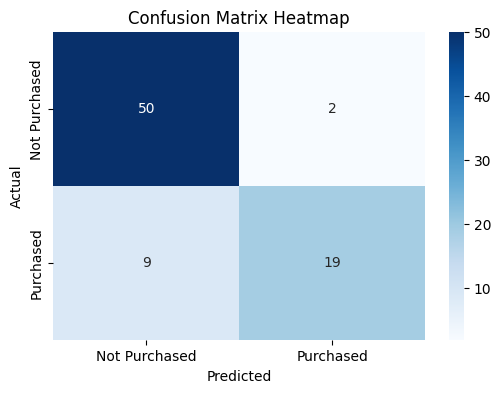

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()